In [1]:
#for data
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
election_df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

In [4]:
election_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


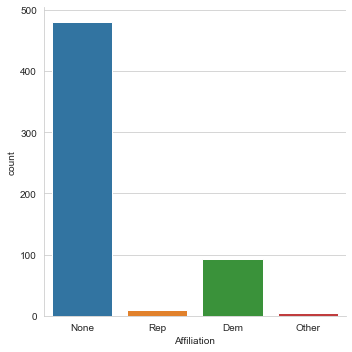

In [5]:
sns.factorplot(x='Affiliation',kind='count',data=election_df)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


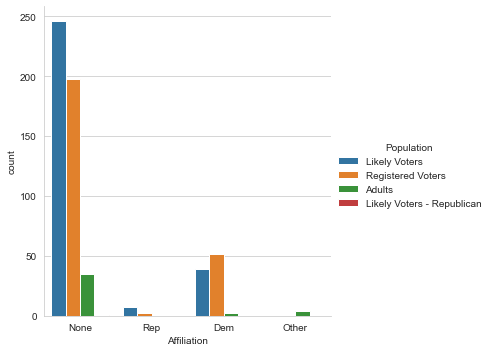

In [6]:
sns.factorplot(x='Affiliation',kind='count',data=election_df,hue='Population')

In [9]:
election_df['Population'].unique()

array(['Likely Voters', 'Registered Voters', 'Adults',
       'Likely Voters - Republican'], dtype=object)

C:\Users\lenovo\AppData\Local\Temp/ipykernel_87504/3672871130.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(election_df.mean())
C:\Users\lenovo\AppData\Local\Temp/ipykernel_87504/3672871130.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = pd.DataFrame(election_df.std())


<AxesSubplot:>

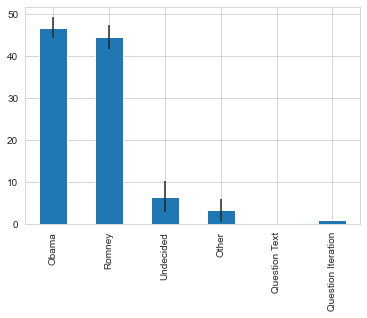

In [12]:
#first we get the average
avg = pd.DataFrame(election_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

#after that lets get the error
std = pd.DataFrame(election_df.std())
std.drop('Number of Observations',axis=0,inplace=True)

#now plot using pandas built in plot
avg.plot(yerr=std,kind='bar',legend=False)

In [13]:
#still very close but undecided factor is till there. Lets take a closer look at numbers

#concanate average and std
election_avg = pd.concat([avg,std],axis=1)

#rename column
election_avg.columns=['Average','STD']

#show
election_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


<AxesSubplot:xlabel='End Date'>

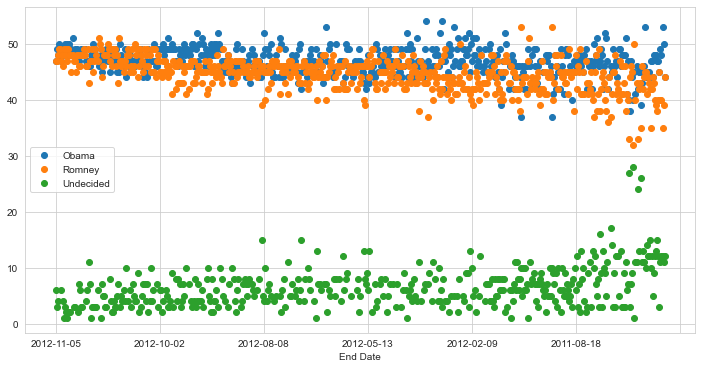

In [19]:
#quick plot of sentiment vs time 
election_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='',figsize=(12,6))

In [38]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
election_df = election_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
election_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0


In [42]:
# Create a new column for the difference between the two candidates
election_df['Difference'] = (election_df.Obama - election_df.Romney)/100
# Preview the new column
election_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


In [43]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
election_df = election_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
election_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


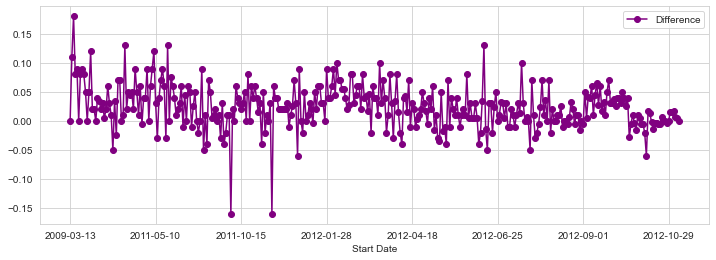

In [44]:
# Plotting the difference in polls between Obama and Romney
fig = election_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [ ]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in election_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print min(xlimit)
print max(xlimit)

In [46]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in election_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))

325
352


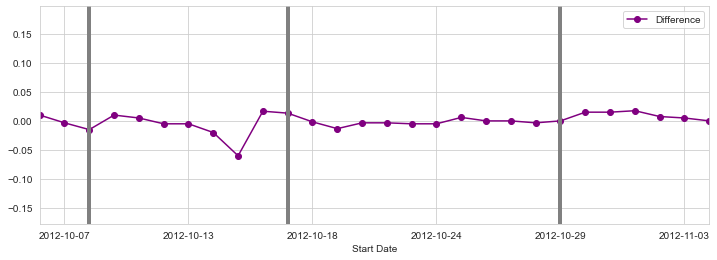

In [47]:
# Start with original figure
fig = election_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(329,356))

# Now add the debate markers
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')